# Importing Libraries

In [33]:
cd C:\Users\venka\OneDrive\Desktop\hackerearth

C:\Users\venka\OneDrive\Desktop\hackerearth


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

# Getting The Dataset

In [9]:
df = pd.read_csv('dataset/traind.csv')

# Getting Analysis of Dataframe

In [10]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [11]:
df['Class'].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

<AxesSubplot:>

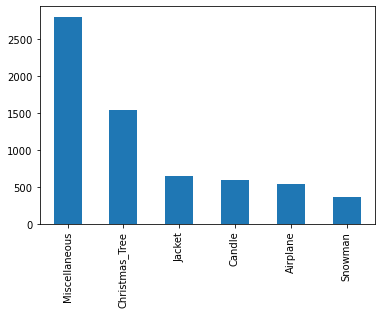

In [12]:
df['Class'].value_counts(sort=True).plot.bar()

# Getting the Images Folder Path

In [13]:
train_image = 'dataset/train'
test_image = 'dataset/test'

# Setting Input Image Size

In [14]:
image_size = [299, 299]

# Splitting Dataframe

In [15]:
train_df,valid_df = train_test_split(df,test_size=.15,stratify=df.Class.values,shuffle=True)


train_df.reset_index(inplace=True,drop=True)
valid_df.reset_index(inplace=True,drop=True)

## Training Dataframe

In [16]:
train_df.head()

,Image,Class
0,image9068.jpg,Miscellaneous
1,image6083.jpg,Miscellaneous
2,image5212.jpg,Jacket
3,image4232.jpg,Miscellaneous
4,image5395.jpg,Jacket


In [17]:
train_df['Class'].value_counts()

Miscellaneous     2380
Christmas_Tree    1308
Jacket             544
Candle             504
Airplane           455
Snowman            307
Name: Class, dtype: int64

<AxesSubplot:>

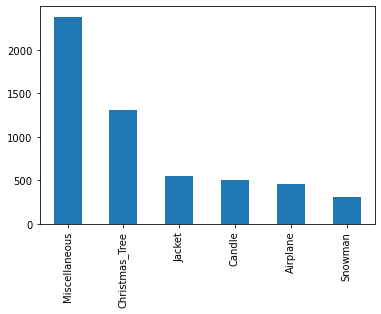

In [18]:
train_df['Class'].value_counts(sort=True).plot.bar()

## Validation Dataframe

In [19]:
valid_df.head()

,Image,Class
0,image5980.jpg,Miscellaneous
1,image5675.jpg,Snowman
2,image6034.jpg,Jacket
3,image6673.jpg,Miscellaneous
4,image5168.jpg,Miscellaneous


In [20]:
valid_df['Class'].value_counts()

Miscellaneous     421
Christmas_Tree    231
Jacket             96
Candle             89
Airplane           80
Snowman            54
Name: Class, dtype: int64

<AxesSubplot:>

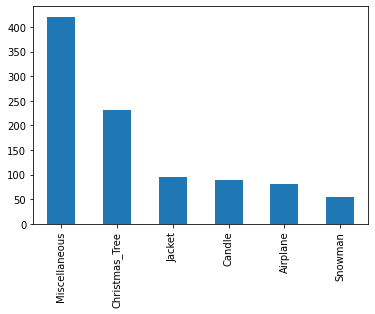

In [21]:
valid_df['Class'].value_counts(sort=True).plot.bar()

# Getting Images and Preprocesing 

## Getting Images for training

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_dataframe(dataframe=train_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

Found 5498 validated image filenames belonging to 6 classes.


# Getting Images for Vaidation

In [23]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_dataframe(dataframe=valid_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

Found 971 validated image filenames belonging to 6 classes.


# Getting The InceptionResNetV2 Model

In [24]:
incep = InceptionResNetV2(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in incep.layers:
  layer.trainable = False  

x = Flatten()(incep.output)


prediction = Dense(6, activation='softmax')(x)

# create a model object
model = Model(inputs=incep.input, outputs=prediction)

# view the structure of the model
model.summary()

219062272/219055592 [==============================] - 126s 1us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_________________________

# Compile the model

In [25]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Fitting the model

In [26]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=12,
  steps_per_epoch=training_set.n//32,
  validation_steps=validation_set.n//32
)

C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
171/171 [==============================] - 1347s 8s/step - loss: 4.3371 - accuracy: 0.7086 - val_loss: 2.1527 - val_accuracy: 0.8667
Epoch 2/12
171/171 [==============================] - 1316s 8s/step - loss: 1.7313 - accuracy: 0.8839 - val_loss: 2.0947 - val_accuracy: 0.8677
Epoch 3/12
171/171 [==============================] - 1292s 8s/step - loss: 1.3735 - accuracy: 0.9056 - val_loss: 2.7258 - val_accuracy: 0.8667
Epoch 4/12
171/171 [==============================] - 1293s 8s/step - loss: 1.6047 - accuracy: 0.9122 - val_loss: 2.4038 - val_accuracy: 0.8771
Epoch 5/12
171/171 [==============================] - 1296s 8s/step - loss: 0.9682 - accuracy: 0.9373 - val_loss: 2.6210 - val_accuracy: 0.8917
Epoch 6/12
171/171 [==============================] - 1280s 7s/step - loss: 1.0091 - accuracy: 0.9383 - val_loss: 2.9092 - val_accuracy: 0.8896
Epoch 7/12
171/171 [==============================] - 1290s 8s/step - loss: 1.1647 - accuracy: 0.9389 - val_loss: 3.1887 - val_accuracy:

# Ploting Loss ansd Accuracy

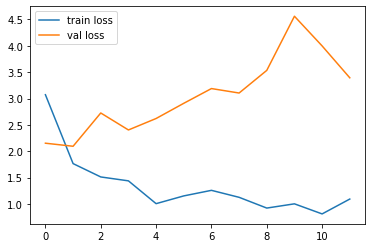

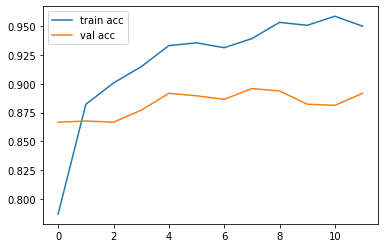

<Figure size 432x288 with 0 Axes>

In [27]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


# Getting Predictions for Test Data Images

In [51]:
name=[]
y_pred=[]
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
for i in os.listdir('dataset/test/'):
    name.append(i)
    i='dataset/test/'+i
    img=image.load_img(i,target_size=(299,299,3))
    img=image.img_to_array(img)/255
    pred=model.predict(img.reshape(1,299,299,3))
    y_pred.append(labels[np.argmax(pred[0])])    

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002B9ECA920E0>

'dataset/test/submission1_deep.csv'

In [49]:
np.argmax(pred[0])

5

In [53]:
data=pd.DataFrame((zip(name,y_pred)),columns=['Image','Class'])
data.head()

,Image,Class
0,image10.jpg,Miscellaneous
1,image100.jpg,Airplane
2,image1013.jpg,Jacket
3,image1014.jpg,Miscellaneous
4,image1018.jpg,Christmas_Tree


In [45]:
image

<module 'keras.preprocessing.image' from 'C:\\Users\\venka\\anaconda3\\lib\\site-packages\\keras\\preprocessing\\image.py'>

In [29]:
os.listdir('dataset/test/')

['image10.jpg',
 'image100.jpg',
 'image1013.jpg',
 'image1014.jpg',
 'image1018.jpg',
 'image1019.jpg',
 'image1021.jpg',
 'image1023.jpg',
 'image1024.jpg',
 'image1029.jpg',
 'image1030.jpg',
 'image1031.jpg',
 'image1032.jpg',
 'image1034.jpg',
 'image1035.jpg',
 'image1040.jpg',
 'image1042.jpg',
 'image1043.jpg',
 'image1045.jpg',
 'image1048.jpg',
 'image1049.jpg',
 'image105.jpg',
 'image1051.jpg',
 'image1052.jpg',
 'image1055.jpg',
 'image1058.jpg',
 'image1059.jpg',
 'image1061.jpg',
 'image1062.jpg',
 'image1063.jpg',
 'image107.jpg',
 'image1073.jpg',
 'image1078.jpg',
 'image108.jpg',
 'image1080.jpg',
 'image1085.jpg',
 'image1086.jpg',
 'image1087.jpg',
 'image1093.jpg',
 'image1095.jpg',
 'image1097.jpg',
 'image11.jpg',
 'image110.jpg',
 'image1100.jpg',
 'image1110.jpg',
 'image1114.jpg',
 'image1120.jpg',
 'image1121.jpg',
 'image1125.jpg',
 'image1126.jpg',
 'image1127.jpg',
 'image1129.jpg',
 'image113.jpg',
 'image1130.jpg',
 'image1138.jpg',
 'image1139.jpg',
 '

In [54]:
data.to_csv('my_submission.csv',index=False)

In [25]:
data.shape

(3489, 2)

In [36]:
pwd

'C:\\Users\\venka\\OneDrive\\Desktop\\hackerearth'

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(directory="dataset",                                                                                
                                            classes=["test"],
                                            batch_size=1,
                                            target_size=(299,299,3))

Found 3489 images belonging to 1 classes.


In [39]:
test_generator

In [43]:
pred=model.predict_generator(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)

labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames


ValueError: in user code:

    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\venka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer batch_normalization is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, None, None, None, 32)


In [ ]:
poo=[]
for file in filenames:
    o,yoo=file.split('\\')
    poo.append(yoo)

In [ ]:
results=pd.DataFrame({"Image":poo,
                      "Class":predictions})

In [ ]:
results.to_csv('submission_deep2.csv',index=False)